/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

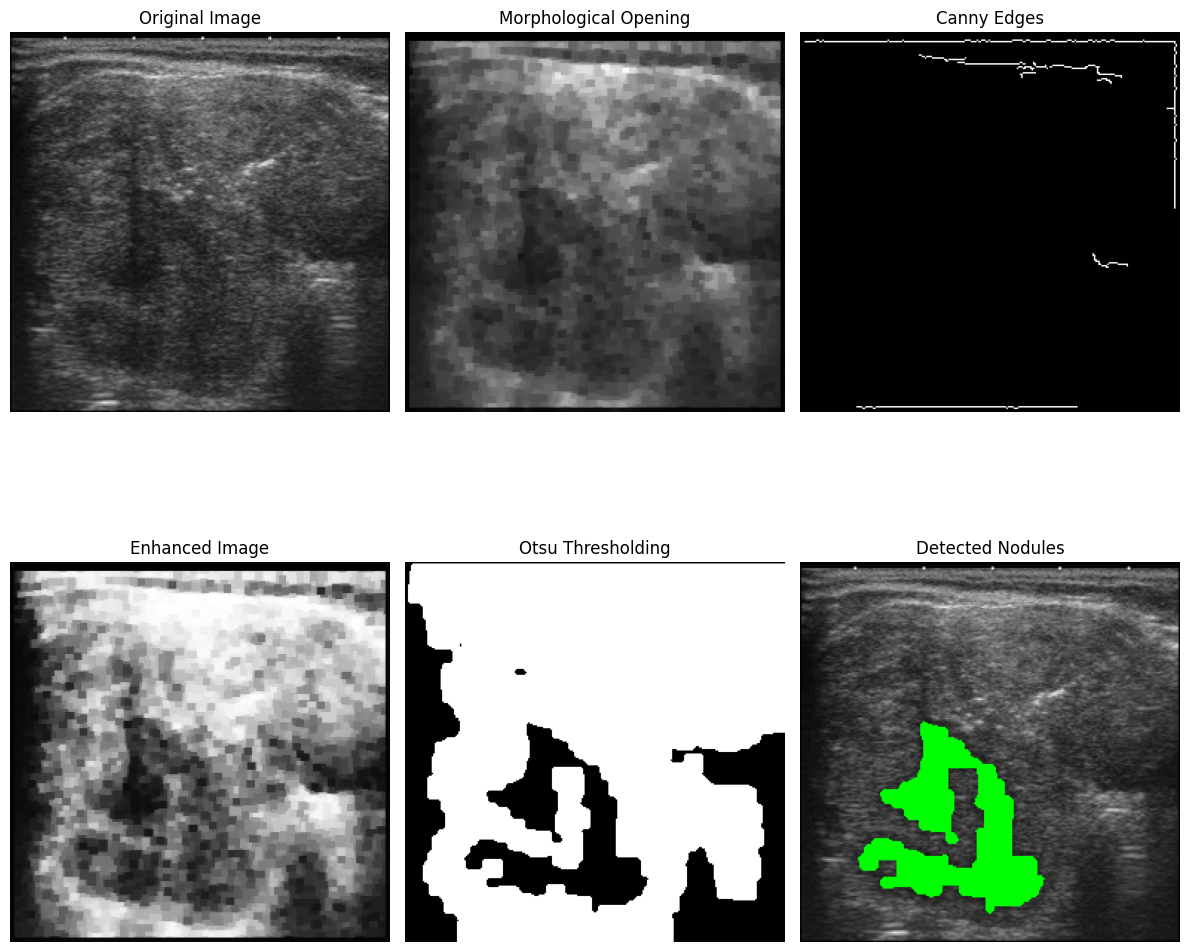

Nodule 1 - Area: 6300.5, Perimeter: 776.6589410305023
GLCM Features: {'contrast': 181.62245710784316, 'dissimilarity': 5.121783088235294, 'homogeneity': 0.6992934780553427, 'energy': 0.08835611286965733, 'correlation': 0.9837333227714299}


In [ ]:
# MIT License
# Copyright (c) [2024] [Md Enamul Hoque Marzun]
# See the LICENSE file for details.



import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from scipy.ndimage import median_filter

def save_image(image, title, step, cmap='gray', dpi=300):
    plt.figure(figsize=(8, 8), dpi=dpi)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

    # Create the 'images' directory if it doesn't exist
    if not os.path.exists('./images'):
        os.makedirs('./images')

    plt.savefig(f'./images/step_{step}_{title}.png', bbox_inches='tight', pad_inches=0)
    plt.close()

def load_image(image_path):
    return cv2.imread(image_path, 0)
# STEP-01  :  Aplying gaussian filter for noise reduction
def gausian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 1)

# STEP-02  :  opening erosion 3 times and dilation 1 times
def morphological_opening(image, kernel_size=3, erode_iterations=3, dilate_iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=erode_iterations)
    opened_image = cv2.dilate(eroded_image, kernel, iterations=dilate_iterations)
    return opened_image

# STEP-03:    canny edge preserve
def edge_preservation(image):
    return cv2.Canny(image, 100, 200)

#STEP-04 :  enhance the opened image .You can use filters for it also i just used Histogram Equalization
def image_enhancement(image):
    return cv2.equalizeHist(image)

#STEP-05 : Optimal Thresholding using otsu
           # After thresholding then dilation 1 times and then applied median filter as Sir said...
def otsu_thresholding(image, kernel_size=3, dilate_iterations=5):
    _, otsu_thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    otsu_thresholded = cv2.dilate(otsu_thresholded, kernel, iterations=dilate_iterations)
    otsu_thresholded = median_filter(otsu_thresholded, size=3)
    return otsu_thresholded

# STEP-06 : extraxting the Region Of Interest(ROI's)
      #Size given by myself
def extract_rois(image, min_size=100, max_size=20000):
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rois = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_size < area < max_size:
            rois.append(contour)
    return rois
# STEP-07 : Extracted ROI's Filled with green color
def fill_contours(image, contours):
    for contour in contours:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), cv2.FILLED)


# STEP-08 : Cut the ROI's and save it to another folder named rois
def visualize_rois(image, contours, save_path='./rois/'):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for i, contour in enumerate(contours):
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [contour], -1, 255, cv2.FILLED)
        roi = cv2.bitwise_and(image, image, mask=mask)
        cv2.imwrite(os.path.join(save_path, f'roi_{i + 1}.png'), roi)

# Some features extraction
def texture_feature_extraction(image):
    glcm = greycomatrix(image, [1], [0], 256, symmetric=True, normed=True)
    features = {
        'contrast': greycoprops(glcm, 'contrast')[0, 0],
        'dissimilarity': greycoprops(glcm, 'dissimilarity')[0, 0],
        'homogeneity': greycoprops(glcm, 'homogeneity')[0, 0],
        'energy': greycoprops(glcm, 'energy')[0, 0],
        'correlation': greycoprops(glcm, 'correlation')[0, 0]
    }
    return features

# save the final output
def save_and_show_results(image, output_image, opened_image, edges, enhanced_image, otsu_thresholded, rois, save_path='./output_dashboard.png'):
    fig, axes = plt.subplots(2, 3, figsize=(12, 12))

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(opened_image, cmap='gray')
    axes[0, 1].set_title('Morphological Opening')
    axes[0, 1].axis('off')

    axes[0, 2].imshow(edges, cmap='gray')
    axes[0, 2].set_title('Canny Edges')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(enhanced_image, cmap='gray')
    axes[1, 0].set_title('Enhanced Image')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(otsu_thresholded, cmap='gray')
    axes[1, 1].set_title('Otsu Thresholding')
    axes[1, 1].axis('off')

    axes[1, 2].imshow(output_image)
    axes[1, 2].set_title('Detected Nodules')
    for contour in rois:
        cv2.drawContours(output_image, [contour], -1, (255, 0, 0), 2)
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

def main():
    image_path = '/content/drive/MyDrive/p_image/2.PNG'    # pl give image path
    image = load_image(image_path)

    # Calling the Functions
    blurred_iamge=gausian_blur(image)
    opened_image = morphological_opening(blurred_iamge)
    edges = edge_preservation(opened_image)
    enhanced_image = image_enhancement(opened_image)
    otsu_thresholded = otsu_thresholding(enhanced_image)

    rois = extract_rois(otsu_thresholded)

    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    fill_contours(output_image, rois)

    visualize_rois(image, rois)

    features = texture_feature_extraction(enhanced_image)

    save_and_show_results(image, output_image, opened_image, edges, enhanced_image, otsu_thresholded, rois)

    # Print ROI Analysis Results
    for i, contour in enumerate(rois):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        print(f"Nodule {i + 1} - Area: {area}, Perimeter: {perimeter}")

    # Print GLCM Feature Extraction Results
    print(f"GLCM Features: {features}")

if __name__ == "__main__":
    main()

#Thank You from MARZUN (*.*)